In [43]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor

In [44]:
#sigmoid function
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [45]:
#calculate mean squared error
def mse(y,yhat):
    return (sum(y-yhat)**2)/(len(y)-1)

In [46]:
#smapling function
def generateSample(size):
    X1 = np.random.normal(size = size)
    X2 = np.random.normal(size = size)
    Z = np.random.normal(size = size)
    a1 = np.array([2,2])
    a2 = np.array([3,-3])
    X = np.array([X1,X2])
    Y = sigmoid(a1.T.dot(X)) + (a2.T.dot(X))**2 + 0.3*Z
    return(np.array([X1,X2,Y]))

In [47]:
#make the sample data and save fuction
def genTT():
    train=generateSample(1000)
    test=generateSample(1000)
    pd.DataFrame(train).T.to_csv('nn_train.csv',index =False)
    pd.DataFrame(test).T.to_csv('nn_test.csv',index =False)

In [48]:
#plotting the model
def drawModelPlot():
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.arange(-3, 3, 0.25)
    Y = np.arange(-3, 3, 0.25)
    X, Y = np.meshgrid(X, Y)
    R = np.sqrt(X**2 + Y**2)
    Z = sigmoid(2*X + 2*Y) + (3*X -3*Y)**2 
    #Z = np.sin(R@)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z)

    plt.show()

In [49]:
#import data from csv
def importData(traindt = 'nn_train.csv', testdt='nn_test.csv'):
    train = pd.read_csv(traindt)
    test = pd.read_csv(testdt)
    X_train = train.iloc[:,0:2].values
    y_train = train.iloc[:,2].values
    X_test = test.iloc[:,0:2].values
    y_test = test.iloc[:,2].values
    return X_train, y_train, X_test, y_test

In [50]:
#get the mse from the node size
def mseFromNodes(nodelst=range(2,11)):
    mseLst = []
    for i in nodelst:
        mlp = MLPRegressor(random_state=0, solver='lbfgs',hidden_layer_sizes=i)
        mlp.fit(X_train, y_train)
        yhat = mlp.predict(X_test)
        mseLst.append([int(i),mse(y_test,yhat)])
    mseArr = np.array(mseLst)
    return mseArr

In [51]:
# plot the graph with number of nodes and mse
def nodeMsePlot(mseArr):
    x = mseArr[:,0]
    y = mseArr[:,1]
    plt.plot(x,y)
    plt.show()

In [56]:
#make sample and save it
genTT()

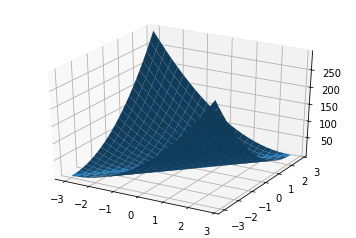

In [57]:
# draw the model plot
drawModelPlot()

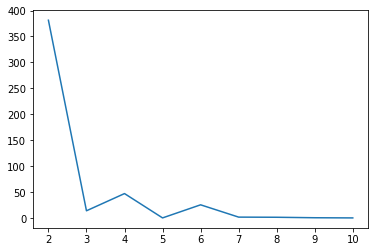

In [58]:
#import the sampled data
X_train, y_train, X_test, y_test = importData()
#get the mse and mse array
mseByNode = mseFromNodes()
#plot the node number and mse graph
nodeMsePlot(mseByNode)

In [59]:
print('The minimum MSE is %.3f with %d nodes' %(mseByNode[mseByNode[:,1]==np.min(mseByNode[:,1])][0][1],
                                                           mseByNode[mseByNode[:,1]==np.min(mseByNode[:,1])][0][0]))

The minimum MSE is 0.010 with 10 nodes
